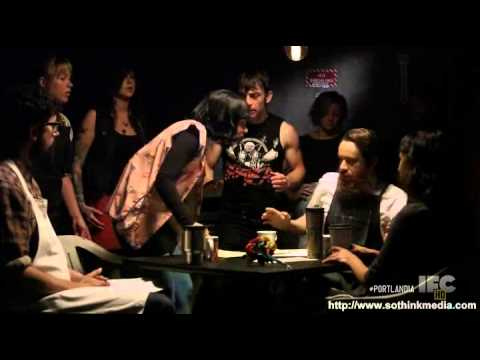

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Jml7NVYm8cs')

In [2]:
!python -m spacy download en_core_web_md

2023-09-12 14:06:45.564808: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-12 14:06:46.843635: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 15.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [1]:
!pip install squarify

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [17]:
import re

In [3]:
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

df = pd.read_csv(url)
df.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
df['full_review_text'][0]

' 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

In [5]:
def get_date(text):
  return text.split(' ')[1]
df['date'] = df['full_review_text'].apply(get_date)

In [6]:
df

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,11/25/2016
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,12/2/2016
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,11/30/2016
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,11/25/2016
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,12/3/2016
...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating,2/19/2015
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating,1/21/2016
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating,4/30/2015
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating,8/2/2015


In [7]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [8]:
print(type(df['date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [9]:
dir(df['date'].iloc[0])

['__add__',
 '__array_priority__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_as_unit',
 '_date_repr',
 '_freq',
 '_freqstr',
 '_from_dt64',
 '_from_value_and_reso',
 '_repr_base',
 '_reso',
 '_round',
 '_set_freq',
 '_short_repr',
 '_time_repr',
 'asm8',
 'astimezone',
 'ceil',
 'combine',
 'ctime',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'dst',
 'floor',
 'fold',
 'freq',
 'freqstr',
 'fromisocalendar',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'ho

In [11]:
df['date'].iloc[0].day_name()
df.head(10)

,coffee_shop_name,full_review_text,star_rating,date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating,2016-11-20
6,The Factory - Cafe With a Soul,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...",4.0 star rating,2016-10-27
7,The Factory - Cafe With a Soul,11/2/2016 2 check-ins Love this place! 5 sta...,5.0 star rating,2016-11-02
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating,2016-10-25
9,The Factory - Cafe With a Soul,11/10/2016 3 check-ins This place has been sh...,5.0 star rating,2016-11-10


In [12]:
df['star_rating'].unique()


array([' 5.0 star rating ', ' 4.0 star rating ', ' 2.0 star rating ',
       ' 3.0 star rating ', ' 1.0 star rating '], dtype=object)

In [15]:
df['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

<Axes: >

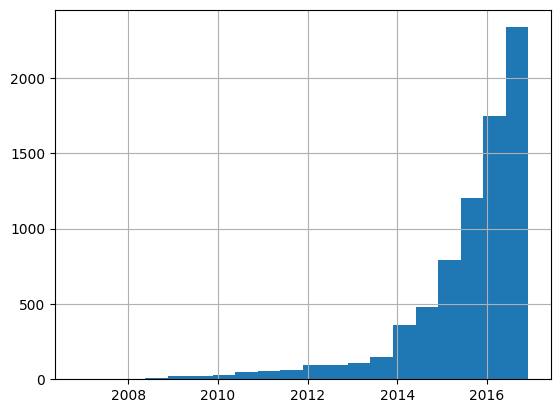

In [16]:
df['date'].hist(bins=20)

In [19]:
def clean_data(text):
  date_regex = r"\d+/\d+/\d+"
  punct_regex = r"[^0-9a-zA-Z\s]"
  special_chars_regex = r"[\$\%\&\@+]"
  numerical_regex = r"\d+"


  text = re.sub(date_regex, "", text)
  text = re.sub(punct_regex, "", text)
  text = re.sub(special_chars_regex, "", text)
  text = re.sub(numerical_regex, "", text)

  whitespace_regex = r"\s+"
  text = re.sub(whitespace_regex, " ", text)

  text = text.lower()

  return text

In [20]:
df['cleaned_review'] = df['full_review_text'].apply(clean_data)
df['cleaned_review'][0]

' checkin love love loved the atmosphere every corner of the coffee shop had its own style and there were swings i ordered the matcha latte and it was muy fantastico ordering and getting my drink were pretty streamlined i ordered on an ipad which included all beverage selections that ranged from coffee to wine desired level of sweetness and a checkout system i got my latte within minutes i was hoping for a typical heart or feather on my latte but found myself listing out all the possibilities of what the art may be any ideas '

In [21]:
tokens = []
for review in df['cleaned_review']:
  tokens.append(review.split(' '))
df['tokens'] = tokens
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,checkin love love loved the atmosphere every ...,"[, checkin, love, love, loved, the, atmosphere..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,listed in date night austin ambiance in austi...,"[, listed, in, date, night, austin, ambiance, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,checkin listed in brunch spots i loved the ec...,"[, checkin, listed, in, brunch, spots, i, love..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating howe...,"[, very, cool, decor, good, drinks, nice, seat..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,checkin they are located within the northcros...,"[, checkin, they, are, located, within, the, n..."


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   coffee_shop_name  7616 non-null   object        
 1   full_review_text  7616 non-null   object        
 2   star_rating       7616 non-null   object        
 3   date              7616 non-null   datetime64[ns]
 4   cleaned_review    7616 non-null   object        
 5   tokens            7616 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 357.1+ KB


In [23]:
df['tokens'] = [review.split(' ') for review in df['cleaned_review']]
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,checkin love love loved the atmosphere every ...,"[, checkin, love, love, loved, the, atmosphere..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,listed in date night austin ambiance in austi...,"[, listed, in, date, night, austin, ambiance, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,checkin listed in brunch spots i loved the ec...,"[, checkin, listed, in, brunch, spots, i, love..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,very cool decor good drinks nice seating howe...,"[, very, cool, decor, good, drinks, nice, seat..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,checkin they are located within the northcros...,"[, checkin, they, are, located, within, the, n..."


In [24]:
from collections import Counter

In [25]:
from collections import Counter

def count(token_lists):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """
    # stores the count of each token
    word_counts = Counter()

    # stores the number of docs that each token appears in
    appears_in_docs = Counter()

    total_docs = len(token_lists)

    for token_list in token_lists:
        # stores count of every appearance of a token
        word_counts.update(token_list)

        # use set() in order to not count duplicates, thereby count the num of docs that each token appears in
        appears_in_docs.update(set(token_list))

    # build word count dataframe
    word_count_dict = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(word_count_dict, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each token
    wc['fraction_of_total'] = wc['count'].apply(lambda token_count: token_count / total)

    # calculate the cumulative percent total of word counts
    wc = wc.sort_values(by='rank')
    wc['cumulative_fraction_of_total'] = wc['fraction_of_total'].cumsum()

    # create dataframe for document stats
    t2 = zip(appears_in_docs.keys(), appears_in_docs.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in_docs'])

    # merge word count stats with doc stats
    wc = ac.merge(wc, on='word')

    wc['appears_in_fraction_of_docs'] = wc['appears_in_docs'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [27]:
import squarify


In [28]:
wc = count(df['tokens'])
print(wc.shape)
wc.head()


(19844, 7)


,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
46,the,6847,34809,1.0,0.044527,0.044527,0.899028
44,and,6864,26651,2.0,0.034091,0.078618,0.901261
70,a,6246,22756,3.0,0.029109,0.107727,0.820116
26,i,5532,20249,4.0,0.025902,0.133629,0.726366
12,to,5653,17164,5.0,0.021956,0.155585,0.742253


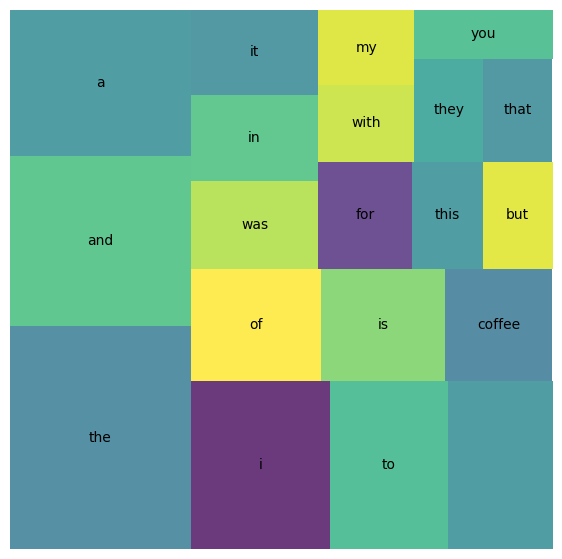

In [29]:
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(7,7))
squarify.plot(sizes=wc_top20['fraction_of_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [30]:
import spacy

In [35]:

!python -m spacy download en_core_web_lg

nlp = spacy.load("en_core_web_lg")


2023-09-12 15:02:44.721662: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 852.2 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [36]:
sample = """
Natural Language Processing Summary
The field of study that focuses on the interactions between human language and computers is called Natural Language Processing, or NLP for short. It sits at the intersection of computer science, artificial intelligence, and computational linguistics (Wikipedia).

“Nat­ur­al Lan­guage Pro­cessing is a field that cov­ers com­puter un­der­stand­ing and ma­nip­u­la­tion of hu­man lan­guage, and it’s ripe with pos­sib­il­it­ies for news­gath­er­ing,” Anthony Pesce said in Natural Language Processing in the kitchen. “You usu­ally hear about it in the con­text of ana­lyz­ing large pools of legis­la­tion or other doc­u­ment sets, at­tempt­ing to dis­cov­er pat­terns or root out cor­rup­tion.”
"""

In [37]:
doc = nlp(text)
doc


Natural Language Processing Summary
The field of study that focuses on the interactions between human language and computers is called Natural Language Processing, or NLP for short. It sits at the intersection of computer science, artificial intelligence, and computational linguistics (Wikipedia).

“Nat­ur­al Lan­guage Pro­cessing is a field that cov­ers com­puter un­der­stand­ing and ma­nip­u­la­tion of hu­man lan­guage, and it’s ripe with pos­sib­il­it­ies for news­gath­er­ing,” Anthony Pesce said in Natural Language Processing in the kitchen. “You usu­ally hear about it in the con­text of ana­lyz­ing large pools of legis­la­tion or other doc­u­ment sets, at­tempt­ing to dis­cov­er pat­terns or root out cor­rup­tion.”

In [132]:
# Define the spacy_tokenizer function (if not already defined)
STOP_WORDS = nlp.Defaults.stop_words.union(['l','Austin', 'latte', '1'])
def spacy_tokenizer(text):

    tokens = []
    for token in nlp(text):
        if (token.text.lower() not in STOP_WORDS) and not token.is_punct and not token.is_space:
            tokens.append(token.lemma_)
    return tokens







In [133]:
df['full_review_text'][10]

' 10/22/2016 1 check-in Listed in Americano This is not your average cute study spot cafe.  Location/ Atmosphere: + Easy parking at the lot + Cute and classy interior decor! + Plenty of seats available (couches, swings, high chairs, etc) + Games like chess & tic tac toe available - No sign of outlets/ charging port on the walls - No wifi available - Not a study cafe unless you have all your papers printed out and don\'t need the internet  Service: o You order by yourself using an iPad up at the counter. + There are 3 iPads available making lines go by faster. + You can request them to text you upon your order being ready + When I told one of the baristas that the fork bin was empty, he kindly brought it over to our table along with a couple of knives! - There was no option to make drinks half sweetened/ less ice on the iPad screen :"(  Food/ Prices: + Highly recommend the Matcha Latte (it was thick and made to perfection!) + The chicken and waffle was well seasoned! + Aesthetically sup

In [134]:
%%time
df['spacy_tokens'] = df['full_review_text'].apply(spacy_tokenizer)

CPU times: user 3min 32s, sys: 550 ms, total: 3min 32s
Wall time: 3min 34s


In [102]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,spacy_tokens,stars,difference
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,2016-11-25,checkin love love loved the atmosphere every ...,"[, checkin, love, love, loved, the, atmosphere...","[in, the, every, of, the, have, its, own, and,...",5,-302
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,2016-12-02,listed in date night austin ambiance in austi...,"[, listed, in, date, night, austin, ambiance, ...","[in, in, the, so, be, this, be, you, a, be, ju...",4,0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,2016-11-30,checkin listed in brunch spots i loved the ec...,"[, checkin, listed, in, brunch, spots, i, love...","[in, in, I, the, and, and, who, do, not, to, a...",4,-5
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,2016-11-25,very cool decor good drinks nice seating howe...,"[, very, cool, decor, good, drinks, nice, seat...","[very, however, just, about, everything, be, f...",2,-1
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,2016-12-03,checkin they are located within the northcros...,"[, checkin, they, are, located, within, the, n...","[in, they, be, within, the, toward, with, of, ...",4,-18


In [106]:
df['star_rating'].unique()

array([5., 4., 2., 3., 1.])

In [113]:
df['stars']

0       5
1       4
2       4
3       2
4       4
       ..
7611    4
7612    5
7613    4
7614    3
7615    4
Name: stars, Length: 7616, dtype: int64

In [47]:
df['stars']

0       5
1       4
2       4
3       2
4       4
       ..
7611    4
7612    5
7613    4
7614    3
7615    4
Name: stars, Length: 7616, dtype: int64

In [114]:
type(df['stars'][0])

numpy.int64

In [115]:
df.head()

,coffee_shop_name,full_review_text,star_rating,date,cleaned_review,tokens,spacy_tokens,stars,difference
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,2016-11-25,checkin love love loved the atmosphere every ...,"[, checkin, love, love, loved, the, atmosphere...","[in, the, every, of, the, have, its, own, and,...",5,-302
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,2016-12-02,listed in date night austin ambiance in austi...,"[, listed, in, date, night, austin, ambiance, ...","[in, in, the, so, be, this, be, you, a, be, ju...",4,0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,2016-11-30,checkin listed in brunch spots i loved the ec...,"[, checkin, listed, in, brunch, spots, i, love...","[in, in, I, the, and, and, who, do, not, to, a...",4,-5
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,2016-11-25,very cool decor good drinks nice seating howe...,"[, very, cool, decor, good, drinks, nice, seat...","[very, however, just, about, everything, be, f...",2,-1
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,2016-12-03,checkin they are located within the northcros...,"[, checkin, they, are, located, within, the, n...","[in, they, be, within, the, toward, with, of, ...",4,-18


In [116]:
# COMPLETE CODE HERE
def star_rating_numeric(rating_string):
  return float(rating_string.split()[0])

df['star_rating'] = df['star_rating'].apply(star_rating_numeric)

df.head()

AttributeError: ignored

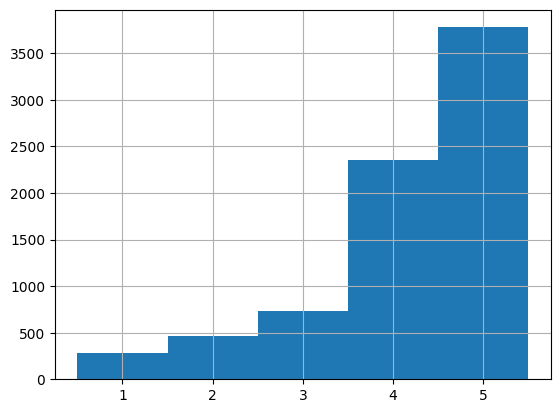

In [125]:
bin_edges = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
df['stars'].hist(bins=bin_edges);

**Looking at this graph, it's evident that a significant majority of the reviews are positive**

In [135]:
good =df[df['stars'] >= 4]
bad = df[df['stars'] < 4]

In [136]:
df.shape[0]

7616

In [137]:
# make sure that all reviews are accounted for in one of the two groups
assert df.shape[0] == good.shape[0] + bad.shape[0]

In [138]:
good_wc = count(good["spacy_tokens"])
good_wc.head(10)

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
32,coffee,3887,7949,1.0,0.027823,0.027823,0.633062
112,place,3122,4796,2.0,0.016787,0.044610,0.508469
174,good,2902,4279,3.0,0.014977,0.059587,0.472638
85,great,2488,3444,4.0,0.012055,0.071642,0.405212
18,check,2686,2942,5.0,0.010298,0.081939,0.437459
205,like,1678,2435,6.0,0.008523,0.090462,0.273290
21,love,1564,2049,7.0,0.007172,0.097634,0.254723
397,come,1484,1992,8.0,0.006972,0.104607,0.241694
42,Austin,1543,1987,9.0,0.006955,0.111561,0.251303
372,time,1340,1770,10.0,0.006195,0.117757,0.218241


In [139]:
bad_wc = count(bad['spacy_tokens'])
bad_wc.head()

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
35,coffee,913,2080,1.0,0.026008,0.026008,0.618564
19,place,750,1223,2.0,0.015292,0.041300,0.508130
1,good,643,990,3.0,0.012379,0.053679,0.435637
34,like,596,945,4.0,0.011816,0.065495,0.403794
53,order,439,767,5.0,0.009590,0.075086,0.297425


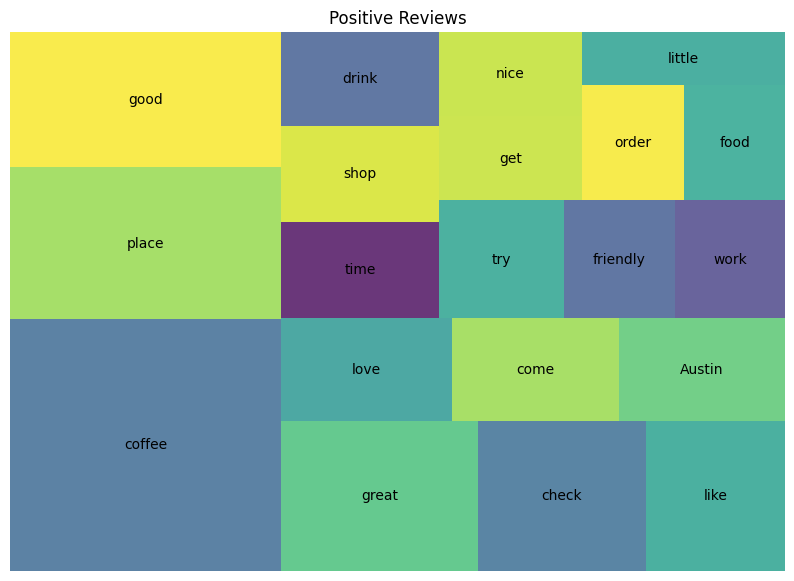

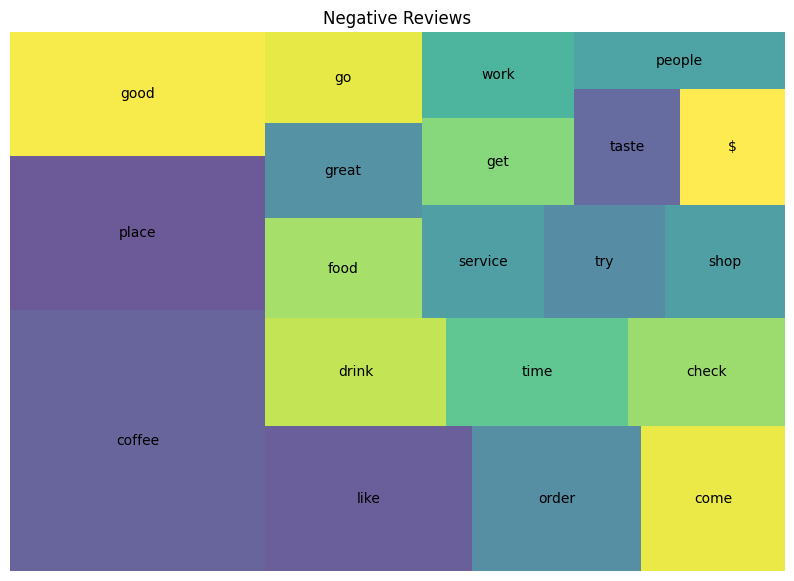

In [140]:
good_top20 = good_wc[good_wc['rank'] <= 20]
plt.figure(figsize=(10,7))
squarify.plot(sizes=good_top20['fraction_of_total'], label=good_top20['word'], alpha=.8 )

plt.title("Positive Reviews")
plt.axis('off')
plt.show()

bad_top20 = bad_wc[bad_wc['rank'] <= 20]
plt.figure(figsize=(10,7))
squarify.plot(sizes=bad_top20['fraction_of_total'], label=bad_top20['word'], alpha=.8)
plt.title("Negative Reviews")
plt.axis('off')
plt.show()

**looking at the correlation between the "good" and "bad" it's apparent that the service and prep time are the main factors when recieving either positive review or a negative review..this makes sense due to the fact that when people are getting coffee they are generally on the way to work, and are in a rush**


In [70]:
good_wc.head()

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
34,coffee,3887,7949,1.0,0.027517,0.027517,0.633062
114,place,3122,4796,2.0,0.016603,0.044120,0.508469
176,good,2902,4279,3.0,0.014813,0.058933,0.472638
87,great,2488,3444,4.0,0.011922,0.070855,0.405212
19,check,2686,2942,5.0,0.010184,0.081040,0.437459


In [78]:

bad_wc.head()

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
35,coffee,913,2080,1.0,0.025773,0.025773,0.618564
19,place,750,1223,2.0,0.015154,0.040927,0.508130
1,good,643,990,3.0,0.012267,0.053194,0.435637
34,like,596,945,4.0,0.011709,0.064904,0.403794
53,order,439,767,5.0,0.009504,0.074408,0.297425


In [89]:





good_keywords = good_wc[good_wc['rank'] <= 20]['word'].tolist()
bad_keywords = bad_wc[bad_wc['rank'] > 20]['word'].tolist()


high_ranked_in_good_not_in_bad = set(good_keywords) - set(bad_keywords)


high_ranked_in_bad_not_in_good = set(bad_keywords) - set(good_keywords)

print("Words ranked high in 'good' but not in 'bad':", high_ranked_in_good_not_in_bad)
print("Words ranked high in 'bad' but not in 'good':", high_ranked_in_bad_not_in_good)



Words ranked high in 'good' but not in 'bad': {'great', 'good', 'get', 'check', '1', 'shop', 'like', 'coffee', 'time', 'work', 'come', 'drink', 'place', 'order', 'try'}
Words ranked high in 'bad' but not in 'good': {'Card', '9/28/2016', 'urgent', 'audism', 'Randy', 'dimensional', '-most', '11', 'blvd', 'workday', 'oz', 'cab', 'GODS', 'badass', 'airway', 'venting', 'socializing', 'Intelligentsia', 'Sugarbombed', 'repeat', 'teabag', 'roller', 'hindsight', 'broccoli', 'snickerdoodle', 'borrow', 'incredulous', '1/12/2014', 'TC', 'reason', 'Mex', 'Friday', 'Bob', 'shelf', 'shoe', 'excel', 'bluegrass', 'specialize', 'unwantedness', '9/10/2015', '6/4/2016', 'Topo', '7/11', 'mental', 'delicious', 'over', 'waaaaaaaaay', 'dog(s', 'wtf', 'spongy', '3/25/2016', 'rediculous', 'follow', 'Total', 'alot', 'happen', 'lovely', 'eccentricity', '9/9/2015', 'unappreciative', 'novice', 'San', 'cultivate', '10/4/2015', 'acquaintance', 'packed', 'glob', '7/7/2015', 'consideration', '10/7/2014', 'Social', 'god

In [92]:
df_pos_keywords_mask = good_wc.word.isin(good_keywords)
df_pos_keywords = good_wc[df_pos_keywords_mask]
df_pos_keywords.head()

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs,difference
34,coffee,3887,7949,1.0,0.027517,0.027517,0.633062,-4062
114,place,3122,4796,2.0,0.016603,0.044120,0.508469,-1674
176,good,2902,4279,3.0,0.014813,0.058933,0.472638,-1377
87,great,2488,3444,4.0,0.011922,0.070855,0.405212,-956
19,check,2686,2942,5.0,0.010184,0.081040,0.437459,-256


In [93]:
df_neg_keywords_mask = bad_wc.word.isin(bad_keywords)
df_neg_keywords = bad_wc[df_neg_keywords_mask]
df_neg_keywords.head()

,word,appears_in_docs,count,rank,fraction_of_total,cumulative_fraction_of_total,appears_in_fraction_of_docs
148,people,281,375,21.0,0.004647,0.167464,0.190379
54,pretty,284,364,22.0,0.004510,0.171974,0.192412
36,nice,286,355,23.0,0.004399,0.176373,0.193767
371,want,271,346,24.0,0.004287,0.180660,0.183604
225,look,252,332,25.0,0.004114,0.184774,0.170732


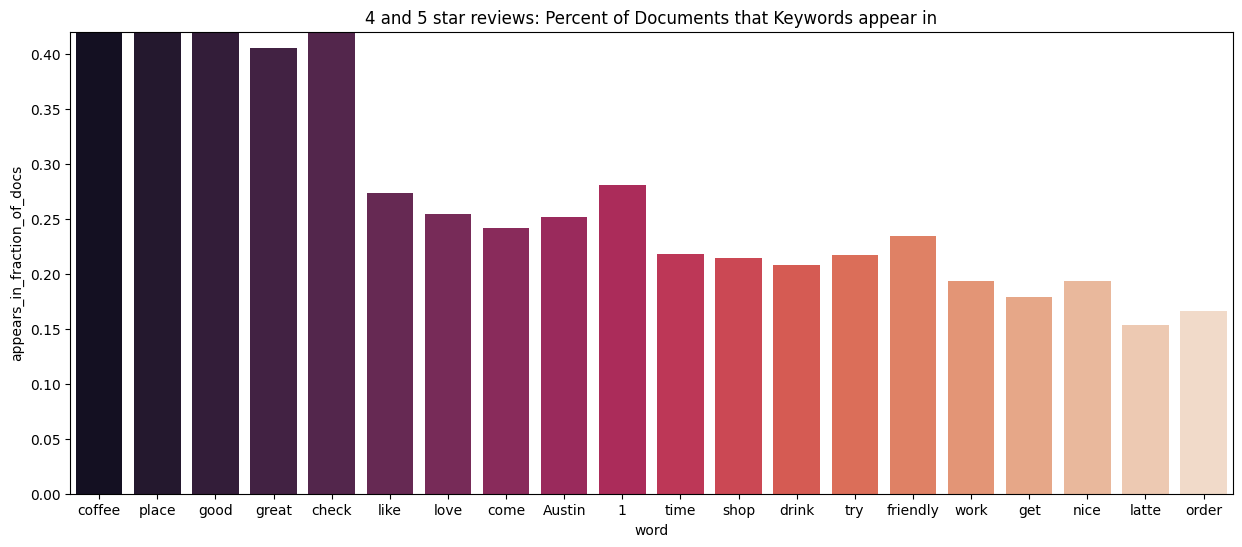

In [97]:

import seaborn as sns

plt.figure(figsize=(15,6))
plt.title("4 and 5 star reviews: Percent of Documents that Keywords appear in")
sns.barplot(x=df_pos_keywords.word, y=df_pos_keywords.appears_in_fraction_of_docs, palette="rocket", order=good_keywords);
plt.ylim(0,.42)
plt.show();



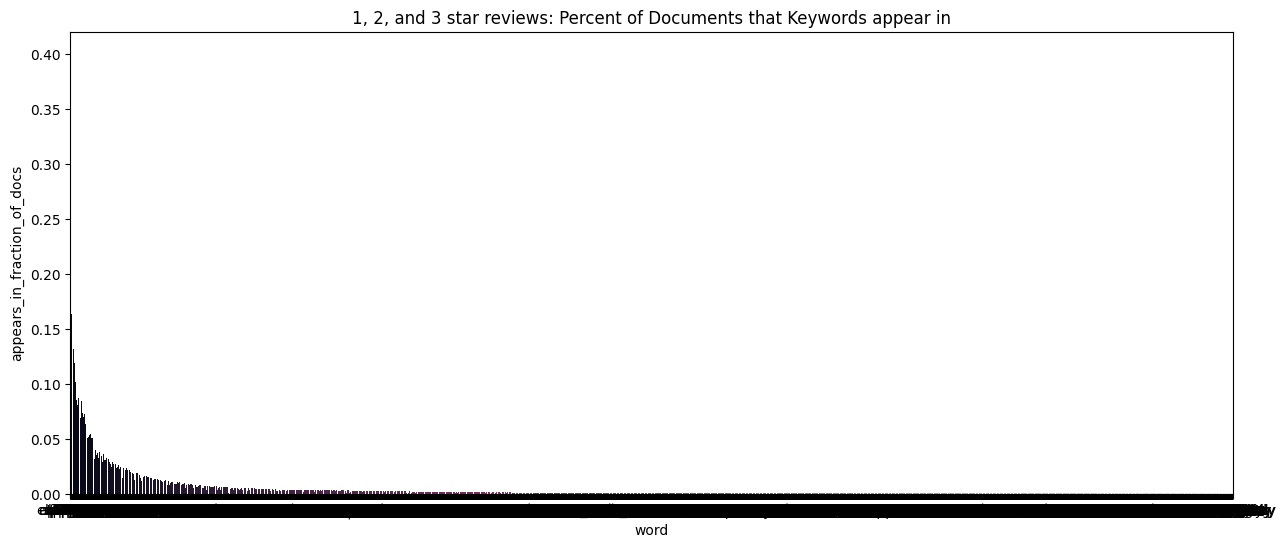

In [98]:
plt.figure(figsize=(15,6))
plt.title("1, 2, and 3 star reviews: Percent of Documents that Keywords appear in")
sns.barplot(x=df_neg_keywords.word, y=df_neg_keywords.appears_in_fraction_of_docs, palette="rocket", order=bad_keywords);
plt.ylim(0,.42)
plt.show();